# Decision Trees
Like SVMs, Decision Trees are versatile ML algorithms usable on classification, regression, and multioutput tasks. They are capable of fitting complex datasets.

Decision trees are the fundamental components of Random Forests, which are among the most powerful ML algorithms available.

This chapter covers:
 - Training and making predictions
 - visualization of Decision Trees
 - The CART training algorithm
 - Regularizing trees for Regression tasks
 - limitations of Decision Trees

## Training and Visualizing a Decision Tree
The following code trains a Decision Tree classifier (I call it dt_clf on iris).

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
iris = load_iris()

In [5]:
X = iris.data[:,2:] # gets "petal length" and "petal width"
# X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [8]:
# Iris target gets the 150-length list of categorized flower species
y = iris.target
print(len(y)) # Length
print(y[[1,51,149]]) # The 3 classes, categorized

150
[0 1 2]


In [9]:
# Building the Decision Tree classifier
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y) # Fitting all data to the model

DecisionTreeClassifier(max_depth=2)

In [10]:
from sklearn.tree import export_graphviz

In [12]:
# NOTE: install graphviz from graphviz website to convert to image
# Use the code under this one...
export_graphviz(tree_clf,
               out_file = 'iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded = True,
                filled = True)

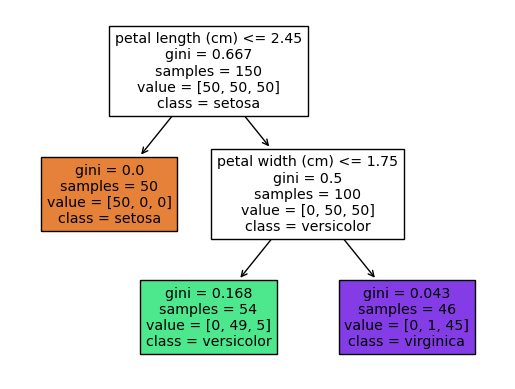

In [18]:
# Use this code to visualize the tree!
tree.plot_tree(tree_clf,
               feature_names = iris.feature_names[2:], 
               class_names=iris.target_names,
               filled = True);

## Making Predictions
*A good quality of decision trees is that they require little data preparation, and do not require scaling or centering at all.*

Using the tree above, we define the variables:
 - *samples*: counts how many training instance the node applies to.
  - The first node (depth-0) should be testing all 150 instances in the iris dataset. The depth-1 nodes apply to 50 and 100 samples, respectively, as only the entire class of iris setosa (class 0) is applicable to the node condition.
  
 - *value*: tells how many training instances of each class this node applies to.
  - The green node (depth-2) shows that 49 versicolors and 5 virginicas apply to this node.
  
 - *Gini*: measures "Impurity"
  - A node is pure if all training instances belong to a single class. Note that the orange node has Gini 0 as it only applies to the setosa class.
  
*Gini Impurity* equation:

 $G_i = 1 - (\sum_{k = 1}^{n}p_{i,k}^2)$
 
where $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node.

The left, depth-2 node (green) has Gini score equal to:

$1 - (0/54)^2 - (49/54)^2 - (5/54)^2$

Note: SKlearn uses the CART algorithm which produces only binary trees: nonleaf nodes always have two children. Other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

In the code `tree_clf = DecisionTreeClassifier(max_depth = 2)`, note `max_depth = 2`. We can make the decision tree grow by making the depth larger.

Note: See Figure 6-2 on page 178 in Geron ML to see the x,y plot of petal length vs petal width.

#### Model Interpretation: White vs Black Box
Decision trees are fairly easy to interpret as we see above, such models are called *white box* models. Other models like Random Forests and Neural Networks are called *black box* models as they are very difficult to interpret. Black box models make great predictions, but it is hard to interpret why they made great predictions: what patterns they found, etc. For example, if a Neural Network says a person appeared in a picture, it is hard to know what contributed to the prediction: the eyes, mouth, nose, etc??

## Estimating Class Probabilities
Decision Trees can also estimate the probability that an instance belongs to a particular class k. Recall the tree diagram above and Figure 6-2 on page 178, first it traverses the tree to find the node for the instance and returns the ratio of instances of class k in this node. 

Given a new (made up) observation of a flower with petal length of 5cm and petal width of 1.5cm, we can see from the above tree diagram that it would predict the Versicolor class with class probabilites 

[0,1,2] => [(0/54),(49/54),(5/54)] => [0%, 90.7%, 9.3%]. See below

In [19]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [20]:
tree_clf.predict([[5,1.5]])

array([1])

## The CART Training Algorithm
Sci-Kit-Learn uses the *Classification and Regression Tree* (CART) algorithm to train Decision Trees (aka grow). 

The *CART Algorithm*:

1. Splits the training set into 2 subsets using a single feature, $k$, and a threshold $t_k$
 - i.e. (feature <= threshold) == (k <= $t_k$) == ("petal length" <= 2.45cm)
 
2. $k$ and $t_k$ are chosen at each node by searching for the pair ($k$, $t_k$) that produces the purest subsets (weighted by size);
 - CART Cost function: $J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
 - Where $G_{left/right}$ measures the impurity of the left/right subsets.
 - and $m_{left/right}$ is the number of instances in the left/right subset.
 - The algorithm tries to minimize this cost function

3. The algorithm continues recursively and stops upon reaching `max_depth` or **if it cannot find a split that reduces impurity**

A few other hyperparameters that control stopping:
 - `min_samples_split`
 - `mins_samples_leaf`
 - `min_weight_fraction_leaf`
 - `max_leaf_nodes`
 
The CART algorithms is *greedy*: it produces good results, but they are not guaranteed to be optimal.

## Computational Complexity
